In [1]:
import xarray as xr
path = "/proj/cvl/users/x_juska/repos/graphcast/predictions.nc"


org_pred = xr.open_dataset(path).compute()


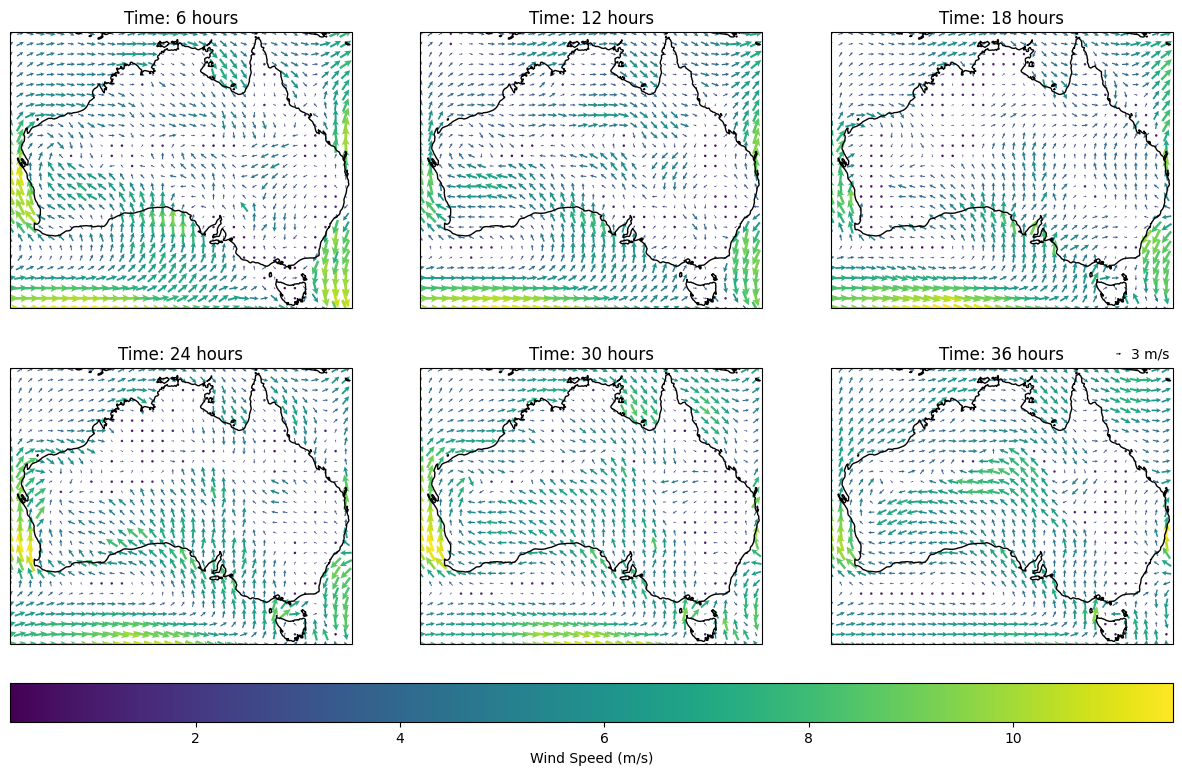

In [30]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

# Define the bounding box for Australia
australia_bbox = [112, 154, -44, -10]  # [min_lon, max_lon, min_lat, max_lat]

def plot_wind(key1, key2, n=5, max_arrow_size=5):  # Add max_arrow_size parameter
    # Extract u and v components of wind
    u_wind = org_pred[key1]
    v_wind = org_pred[key2]
    
    # Create a mask for Australia
    mask = (
        (u_wind.lon >= australia_bbox[0]) & 
        (u_wind.lon <= australia_bbox[1]) & 
        (u_wind.lat >= australia_bbox[2]) & 
        (u_wind.lat <= australia_bbox[3])
    )

    # Apply the mask to both u and v components
    australia_u_wind = u_wind.where(mask, drop=True)
    australia_v_wind = v_wind.where(mask, drop=True)

    # Plot for different time steps
    fig, axes = plt.subplots(2, 3, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
    axes = axes.flatten()

    for i, time in enumerate(australia_u_wind.time[:6]):  # Plot first 9 time steps
        ax = axes[i]
        u_data = australia_u_wind.sel(time=time, batch=0)
        v_data = australia_v_wind.sel(time=time, batch=0)
        
        # Subsample the data
        u_data = u_data[::n, ::n]
        v_data = v_data[::n, ::n]
        
        # Calculate wind speed for coloring
        wind_speed = np.sqrt(u_data**2 + v_data**2)
        
        # Create a quiver plot with color based on wind speed
        q = ax.quiver(u_data.lon, u_data.lat, u_data, v_data, 
                      wind_speed,
                      transform=ccrs.PlateCarree(), 
                      scale=60, scale_units='inches',  # Adjusted scale for bigger arrows
                      cmap='viridis',
                      width=0.008,  # Increased width for bigger arrows
                      headwidth=3,  # Increased headwidth for bigger arrows
                      headlength=3,  # Increased headlength for bigger arrows
                      headaxislength=2.5,  # Increased headaxislength for bigger arrows
                      minshaft=2,  # Increased minshaft for bigger arrows
                      pivot='mid')  # Set pivot to 'mid' for centered arrows
        
        # Add coastlines and set extent to Australia
        ax.coastlines()
        ax.set_extent(australia_bbox, crs=ccrs.PlateCarree())
        
        # Add title with time information
        ax.set_title(f'Time: {org_pred.time[i].values / np.timedelta64(1, "h"):.0f} hours')

    # Add a colorbar
    cbar = fig.colorbar(q, ax=axes.ravel().tolist(), orientation='horizontal', pad=0.05, aspect=30)
    cbar.set_label('Wind Speed (m/s)')

    # Add a key for the quiver plot
    plt.quiverkey(q, X=0.85, Y=1.05, U=max_arrow_size,
                  label=f'{max_arrow_size} m/s', labelpos='E')

    # Add overall title with the keys

    plt.show()

plot_wind('10m_u_component_of_wind', '10m_v_component_of_wind', n=5, max_arrow_size=3)

In [4]:
org_pred

<xarray.Dataset> Size: 8GB
Dimensions:                  (time: 9, batch: 1, lat: 721, lon: 1440, level: 37)
Coordinates:
  * lat                      (lat) float64 6kB -90.0 -89.75 -89.5 ... 89.75 90.0
  * lon                      (lon) float64 12kB 0.0 0.25 0.5 ... 359.5 359.8
  * level                    (level) float64 296B 1.0 2.0 3.0 ... 975.0 1e+03
  * time                     (time) timedelta64[ns] 72B 0 days 06:00:00 ... 2...
Dimensions without coordinates: batch
Data variables:
    10m_u_component_of_wind  (time, batch, lat, lon) float32 37MB -0.4692 ......
    10m_v_component_of_wind  (time, batch, lat, lon) float32 37MB -0.9805 ......
    2m_temperature           (time, batch, lat, lon) float32 37MB 248.0 ... 2...
    geopotential             (time, batch, level, lat, lon) float32 1GB 4.941...
    mean_sea_level_pressure  (time, batch, lat, lon) float32 37MB 1.001e+05 ....
    specific_humidity        (time, batch, level, lat, lon) float32 1GB 3.906...
    temperature              (time, batch, level, lat, lon) float32 1GB 287.4...
    total_precipitation_6hr  (time, batch, lat, lon) float32 37MB 3.841e-05 ....
    u_component_of_wind      (time, batch, level, lat, lon) float32 1GB 0.744...
    v_component_of_wind      (time, batch, level, lat, lon) float32 1GB 1.13 ...
    vertical_velocity        (time, batch, level, lat, lon) float32 1GB -0.00...